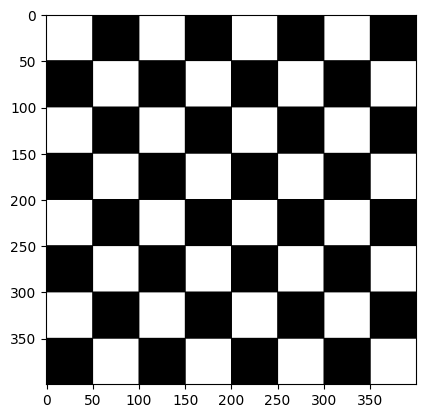

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the size of each square
square_size = 50

# Define the size of the chessboard
board_size = square_size * 8

# Initialize a white image (3 channels for RGB)
chessboard = np.ones((board_size, board_size, 3), dtype=np.uint8) * 255

# plt.imshow(chessboard)
# plt.show()

# Loop through each square
for row in range(8):
    for col in range(8):
        # Calculate the top left and bottom right corners of the square
        top_left = (col * square_size, row * square_size)
        bottom_right = ((col + 1) * square_size, (row + 1) * square_size)
        
        # Check if the square should be black or white
        if (row + col) % 2 == 1:
            cv2.rectangle(chessboard, top_left, bottom_right, (0, 0, 0), -1)

# Convert BGR to RGB for plt display
chessboard_rgb = cv2.cvtColor(chessboard, cv2.COLOR_BGR2RGB)

# Display the chessboard using plt
plt.imshow(chessboard_rgb)
# plt.axis('off')  # Turn off the axis
plt.show()

## Reverse black and white with opencv

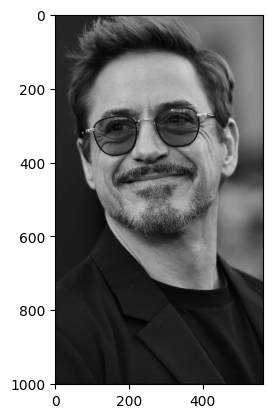

In [2]:
# Convert image to grayscale
image_path = 'raw_image/robert_raw.png'
image = cv2.imread(image_path, 0)
plt.imshow(image, cmap='gray')

## Rotate image

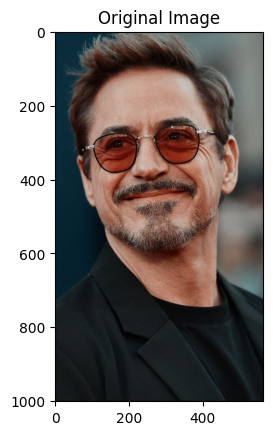

Text(0.5, 1.0, 'Rotated Image')

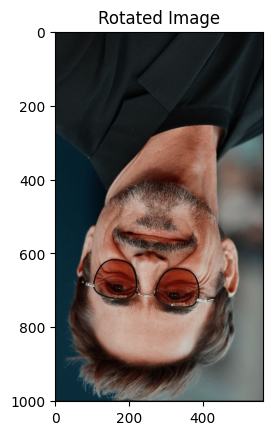

In [3]:
image_path = 'raw_image/robert_raw.png'
image = cv2.imread(image_path)
plt.imshow(image[:, :, ::-1])
plt.title('Original Image')
plt.show()

result = image[::-1, :]
plt.imshow(result[:, :, ::-1])
plt.title('Rotated Image')

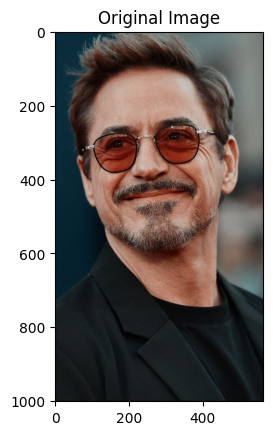

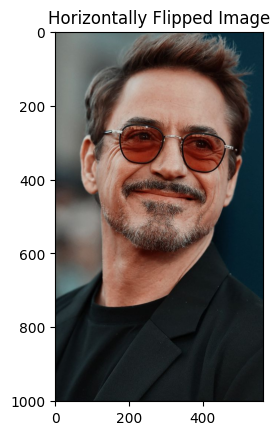

In [4]:
import cv2
import matplotlib.pyplot as plt

image_path = 'raw_image/robert_raw.png'
image = cv2.imread(image_path)
plt.imshow(image[:, :, ::-1])
plt.title('Original Image')
plt.show()

# Xoay ngang tấm hình
result = image[:, ::-1]
plt.imshow(result[:, :, ::-1])
plt.title('Horizontally Flipped Image')
plt.show()

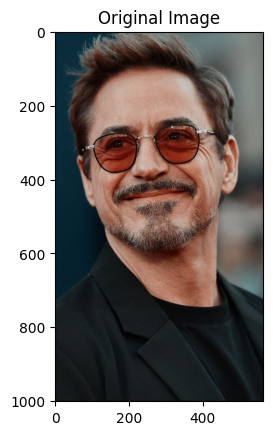

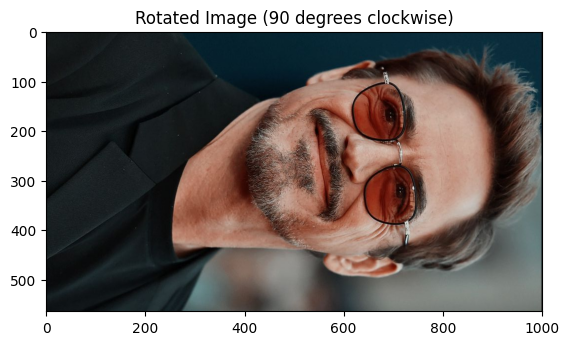

In [5]:
image_path = 'raw_image/robert_raw.png'
image = cv2.imread(image_path)
plt.imshow(image[:, :, ::-1])
plt.title('Original Image')
plt.show()

# Xoay ngang cả tấm hình (90 độ theo chiều kim đồng hồ)
result = np.transpose(image, (1, 0, 2))[:, ::-1]
plt.imshow(result[:, :, ::-1])
plt.title('Rotated Image (90 degrees clockwise)')
plt.show()

## Color Seperate

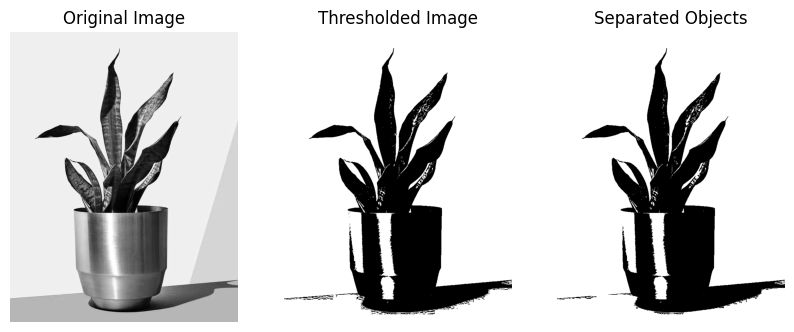

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def separate_objects(image_path, threshold_value=127):
    # Step 1: Read the image in grayscale mode
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Step 2: Apply thresholding
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    
    # Step 3: Find contours
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Step 4: Draw contours on a blank image
    separated_objects_image = np.zeros_like(image)
    cv2.drawContours(separated_objects_image, contours, -1, (255), thickness=cv2.FILLED)
    
    return thresholded_image, separated_objects_image, contours

# Parameters
image_path = 'raw_image/object_raw.jpeg'  # Replace with your image path
threshold_value = 180  # Adjust this value as needed

# Perform object separation
thresholded_image, separated_objects_image, contours = separate_objects(image_path, threshold_value)

# Display the results using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.axis('off')

# Thresholded Image
plt.subplot(1, 3, 2)
plt.title('Thresholded Image')
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')

# Separated Objects Image
plt.subplot(1, 3, 3)
plt.title('Separated Objects')
plt.imshow(separated_objects_image, cmap='gray')
plt.axis('off')

plt.show()

## Gradient

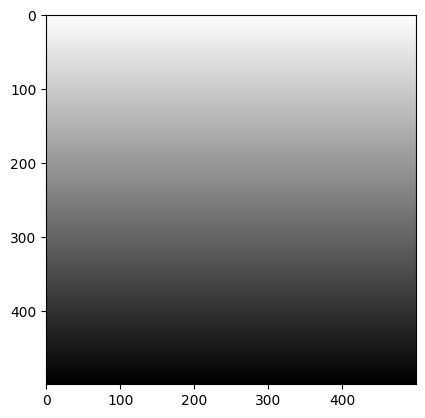

In [8]:
# Set the image dimensions
height = 500
width = 500

# Create a gradient using NumPy
# Start with a linear gradient
gradient = np.linspace(255, 0, height, dtype=np.uint8)

# Repeat the gradient across the width of the image
gradient = np.tile(gradient, (width, 1))

# Convert to 3 channels (grayscale to BGR)
gradient_image = np.stack((gradient, gradient, gradient), axis=-1)
gradient_image = rotate_image(gradient_image)

# Save the gradient image
plt.imshow(gradient_image)
plt.show()


## Letter 'B'

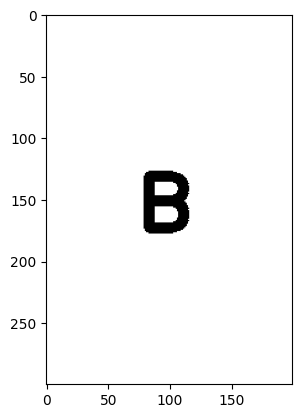

In [9]:
# Design a letter 'B' using NumPy and openCV
import cv2
import numpy as np

# Set the image dimensions
height = 300
width = 200

# Create a white image
image = np.ones((height, width, 3), dtype=np.uint8) * 255

# Define the font and scale
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2
font_thickness = 7

# Define the color (black)
color = (0, 0, 0)

# Calculate text size to center the text
text = 'B'
(text_width, text_height), _ = cv2.getTextSize(text, font, font_scale, font_thickness)
text_x = (width - text_width) // 2
text_y = (height + text_height) // 2

# Put the text on the image
cv2.putText(image, text, (text_x, text_y), font, font_scale, color, font_thickness)

# Display the image
plt.imshow(image)
plt.show()

## Finding the secret by subtract

In [10]:
import numpy as np
import cv2

# Read the images
image1 = cv2.imread('image/image1.png')
image2 = cv2.imread('image/image2.png')

# Check if the images have the same dimensions
if image1.shape == image2.shape:
    # Compute the absolute difference between the two images
    difference = cv2.absdiff(image1, image2)
    
    # Print the resulting difference matrix
    print(difference)
else:
    print("The images do not have the same dimensions.")

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


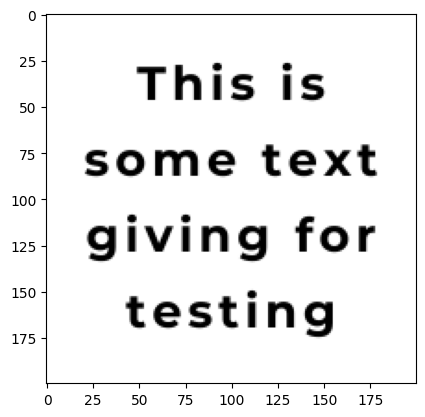

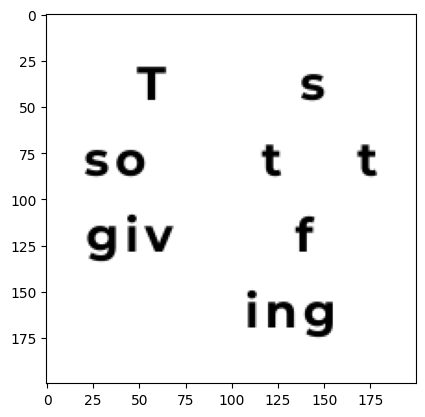

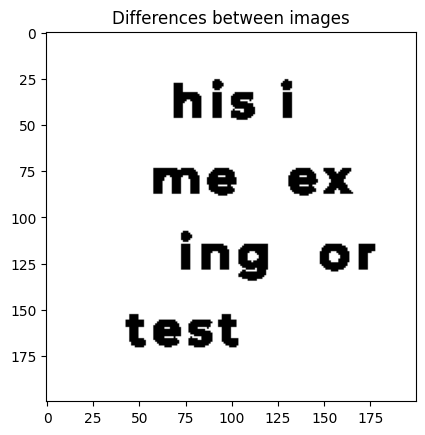

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the images
image1 = cv2.imread('image/image1.png')
image2 = cv2.imread('image/image2.png')
plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()

# Check if the images have the same dimensions
if image1.shape == image2.shape:
    # Compute the absolute difference between the two images
    difference = cv2.absdiff(image1, image2)
    
    # Create a mask where differences exist
    mask = np.any(difference != 0, axis=-1).astype(np.uint8) * 255
    
    # Convert the mask to a 3-channel image
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    
    # Reverse the colors of the mask
    reversed_mask_rgb = cv2.bitwise_not(mask_rgb)
    
    # Display the reversed mask using Matplotlib
    plt.imshow(reversed_mask_rgb, cmap='gray')
    plt.title('Differences between images')
    plt.show()
else:
    print("The images do not have the same dimensions.")
